**Logistic Regression**

Logistic Regression Accuracy: 100%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       248
           1       1.00      1.00      1.00       169

    accuracy                           1.00       417
   macro avg       1.00      1.00      1.00       417
weighted avg       1.00      1.00      1.00       417



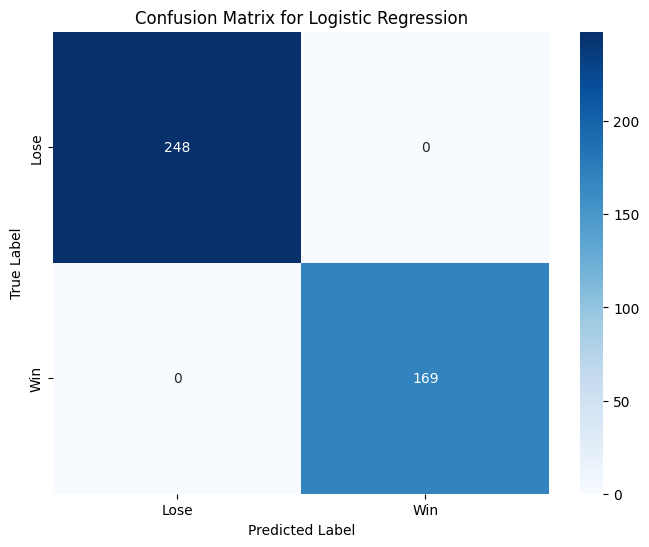

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (ensure the file path is correct)
data = pd.read_csv("matches.csv")

# Data Preprocessing for Logistic Regression
relevant_features_lr = ['venue', 'gf', 'ga', 'sh', 'sot', 'team', 'result']
data_filtered_lr = data[relevant_features_lr]
data_filtered_lr = data_filtered_lr.dropna()  # Handling missing values

# Label encoding for categorical columns
label_encoders_lr = {}
for column in ['venue', 'team', 'result']:
    le = LabelEncoder()
    data_filtered_lr[column] = le.fit_transform(data_filtered_lr[column])
    label_encoders_lr[column] = le

# Separating features and target variable
X_lr = data_filtered_lr.drop('result', axis=1)
y_lr = data_filtered_lr['result'].apply(lambda x: 1 if x == 1 else 0)  # Binary outcome: win and not win

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_lr_scaled = scaler.fit_transform(X_lr)

# Train-test split with scaled data
X_train_lr_scaled, X_test_lr_scaled, y_train_lr, y_test_lr = train_test_split(X_lr_scaled, y_lr, test_size=0.3, random_state=42)

# Logistic Regression Model
model_lr = LogisticRegression()
model_lr.fit(X_train_lr_scaled, y_train_lr)
y_pred_lr = model_lr.predict(X_test_lr_scaled)

# Model Evaluation
accuracy_lr = accuracy_score(y_test_lr, y_pred_lr)
report_lr = classification_report(y_test_lr, y_pred_lr)

# Outputting results
print(f"Logistic Regression Accuracy: {round(accuracy_lr * 100)}%")
print("Logistic Regression Classification Report:")
print(report_lr)

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test_lr, y_pred_lr)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0.5, 1.5], ['Lose', 'Win'])
plt.yticks([0.5, 1.5], ['Lose', 'Win'])
plt.show()


**Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train_lr_scaled, y_train_lr)  # Using the same train-test split as Logistic Regression
nb_y_pred = nb_model.predict(X_test_lr_scaled)
nb_accuracy = accuracy_score(y_test_lr, nb_y_pred)


# Counting the predicted wins and losses for Gaussian Naive Bayes
predicted_wins_nb = np.sum(nb_y_pred == 1)
predicted_losses_nb = np.sum(nb_y_pred == 0)

# Counting the actual wins and losses in the test data
actual_wins_nb = np.sum(y_test_lr == 1)
actual_losses_nb = np.sum(y_test_lr == 0)

print("Gaussian Naive Bayes Predicted Wins:", predicted_wins_nb)
print("Gaussian Naive Bayes Predicted Losses:", predicted_losses_nb)
print("Actual Wins:", actual_wins_nb)
print("Actual Losses:", actual_losses_nb)
print(f"Gaussian Naive Bayes Accuracy: {round(nb_accuracy*100)}%")
nb_classification_report = classification_report(y_test_lr, nb_y_pred)

# Printing the report
print("Gaussian Naive Bayes Classification Report:")
print(nb_classification_report)


Gaussian Naive Bayes Predicted Wins: 182
Gaussian Naive Bayes Predicted Losses: 235
Actual Wins: 169
Actual Losses: 248
Gaussian Naive Bayes Accuracy: 91%
Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       248
           1       0.86      0.92      0.89       169

    accuracy                           0.91       417
   macro avg       0.90      0.91      0.90       417
weighted avg       0.91      0.91      0.91       417



**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
matches_df = pd.read_csv("matches.csv")  # Replace with your file path if different

# Data Preprocessing for Random Forest
features_rf = ['time', 'comp', 'round', 'day', 'venue', 'gf', 'ga', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt']
target_rf = 'result'
filtered_df_rf = matches_df[features_rf + [target_rf]]
filtered_df_rf = filtered_df_rf.dropna()  # Handling missing values
label_encoders_rf = {}
for column in filtered_df_rf.select_dtypes(include=['object']).columns:
    le_rf = LabelEncoder()
    filtered_df_rf[column] = le_rf.fit_transform(filtered_df_rf[column])
    label_encoders_rf[column] = le_rf

# Separating features and target
X_rf = filtered_df_rf[features_rf]
y_rf = filtered_df_rf[target_rf]

# Train-test split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

# Random Forest Classifier Model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_rf, y_train_rf)
y_pred_rf = model_rf.predict(X_test_rf)
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
report_rf = classification_report(y_test_rf, y_pred_rf)
predicted_wins_rf = np.sum(y_pred_rf == 1)
predicted_losses_rf = np.sum(y_pred_rf == 0)

# Counting the actual wins and losses in the test data for Random Forest
actual_wins_rf = np.sum(y_test_rf == 1)
actual_losses_rf = np.sum(y_test_rf == 0)

print("Random Forest Predicted Wins:", predicted_wins_rf)
print("Random Forest Predicted Losses:", predicted_losses_rf)
print("Actual Wins:", actual_wins_rf)
print("Actual Losses:", actual_losses_rf)
print(f"Random Forest Classifier Accuracy: {round(accuracy_rf*100)}%")
print("Random Forest Classifier Classification Report:")
print(report_rf)


Random Forest Predicted Wins: 179
Random Forest Predicted Losses: 99
Actual Wins: 179
Actual Losses: 98
Random Forest Classifier Accuracy: 99%
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        98
           1       0.99      0.99      0.99       179
           2       1.00      0.99      1.00       140

    accuracy                           0.99       417
   macro avg       0.99      0.99      0.99       417
weighted avg       0.99      0.99      0.99       417



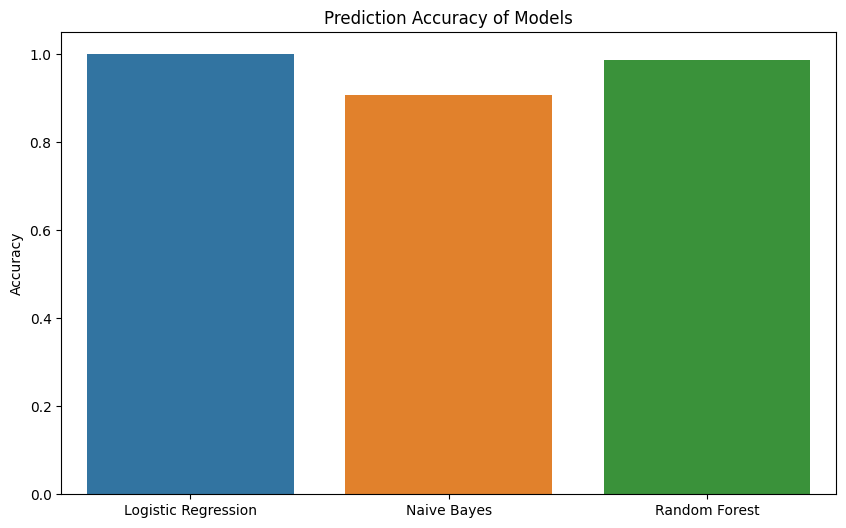

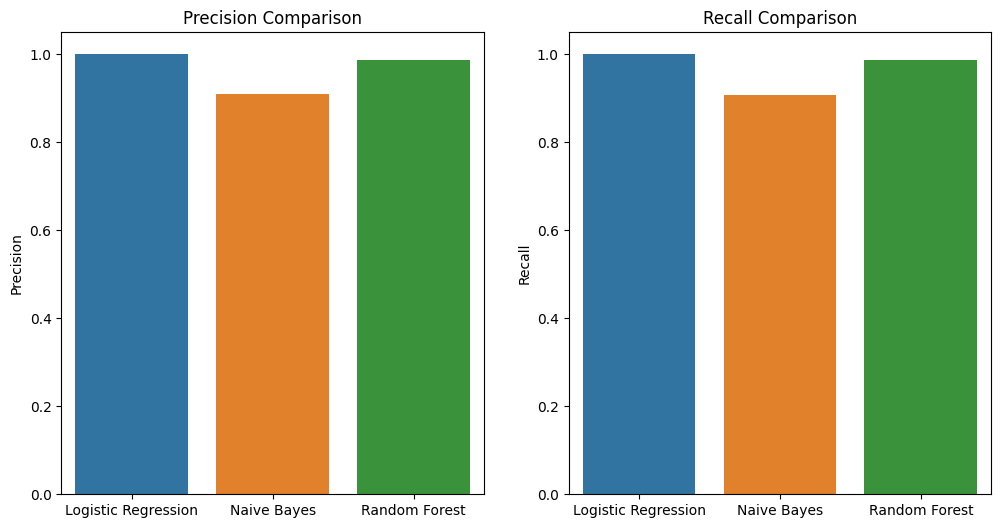

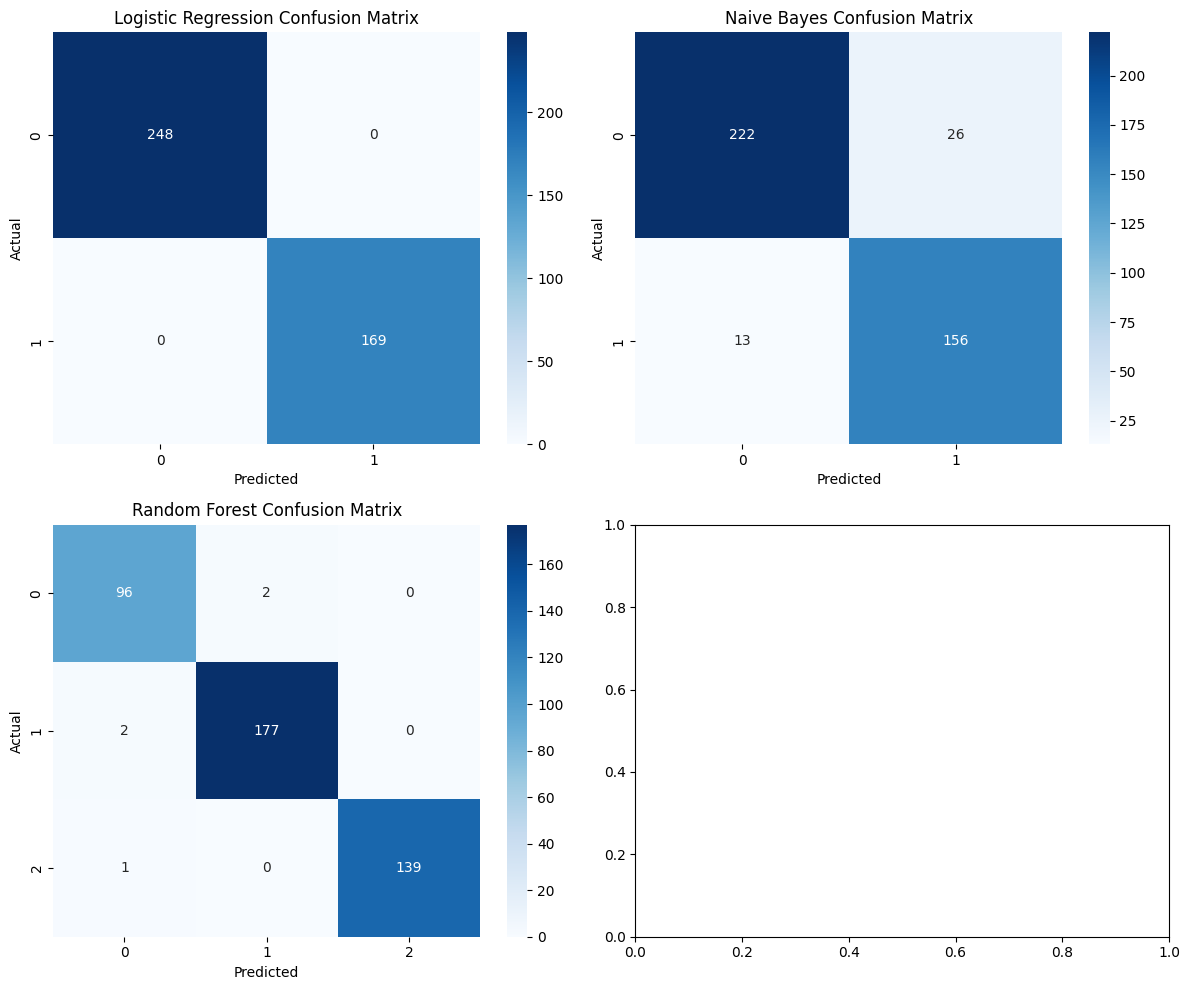

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Calculate precision and recall for each model using 'weighted' average
precision_lr = precision_score(y_test_lr, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test_lr, y_pred_lr, average='weighted')

precision_nb = precision_score(y_test_lr, nb_y_pred, average='weighted')
recall_nb = recall_score(y_test_lr, nb_y_pred, average='weighted')

precision_rf = precision_score(y_test_rf, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test_rf, y_pred_rf, average='weighted')

# Confusion Matrices
conf_matrix_lr = confusion_matrix(y_test_lr, y_pred_lr)
conf_matrix_nb = confusion_matrix(y_test_lr, nb_y_pred)
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)


# Bar chart for prediction accuracy
plt.figure(figsize=(10, 6))
model_names = ['Logistic Regression', 'Naive Bayes', 'Random Forest']
accuracies = [accuracy_lr, nb_accuracy, accuracy_rf]
sns.barplot(x=model_names, y=accuracies)
plt.title('Prediction Accuracy of Models')
plt.ylabel('Accuracy')
plt.show()

# Precision and Recall comparison
plt.figure(figsize=(12, 6))
precisions = [precision_lr, precision_nb, precision_rf]
recalls = [recall_lr, recall_nb, recall_rf]

plt.subplot(1, 2, 1)
sns.barplot(x=model_names, y=precisions)
plt.title('Precision Comparison')
plt.ylabel('Precision')

plt.subplot(1, 2, 2)
sns.barplot(x=model_names, y=recalls)
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name, ax):
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=ax)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Plotting confusion matrices for each model
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plot_confusion_matrix(conf_matrix_lr, 'Logistic Regression', axes[0, 0])
plot_confusion_matrix(conf_matrix_nb, 'Naive Bayes', axes[0, 1])
plot_confusion_matrix(conf_matrix_rf, 'Random Forest', axes[1, 0])
plt.tight_layout()
plt.show()

<ipython-input-83-b34e97c4cc30>:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


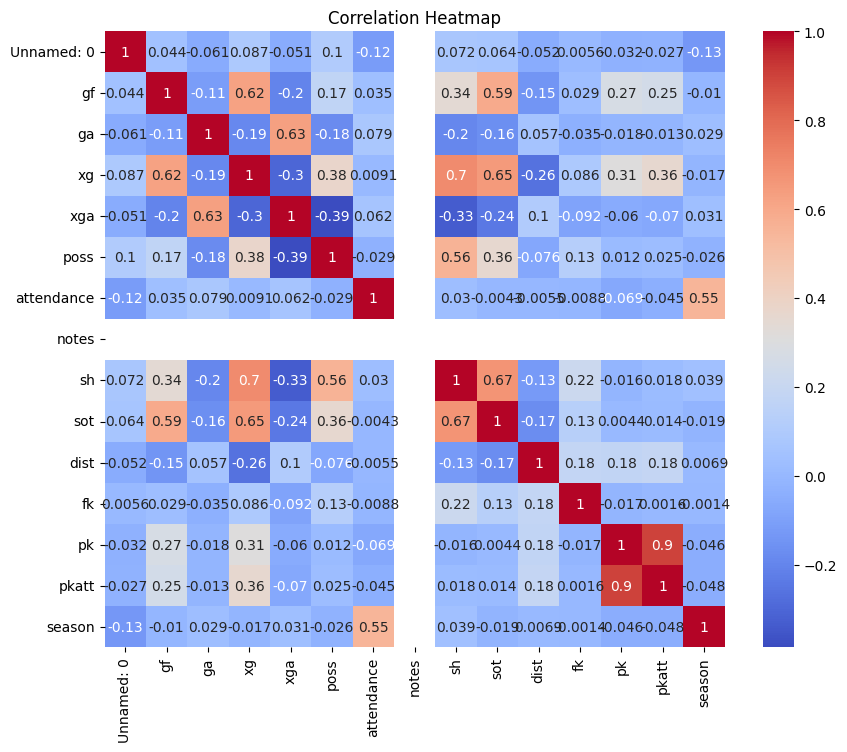

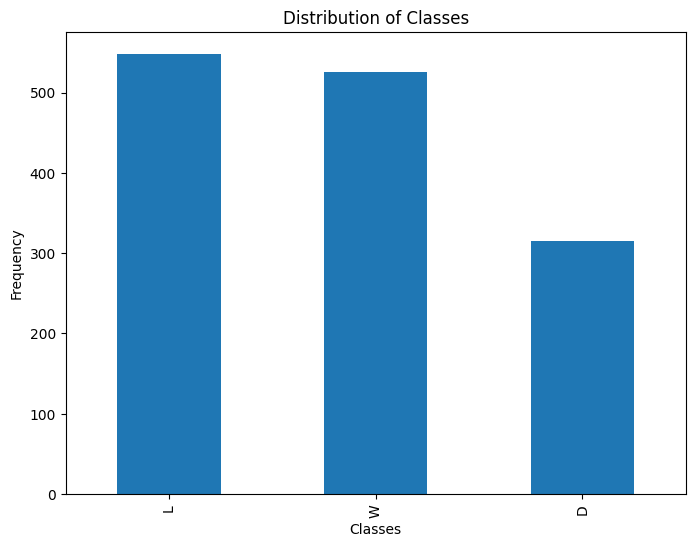

(28,
 1389,
 Unnamed: 0        int64
 date             object
 time             object
 comp             object
 round            object
 day              object
 venue            object
 result           object
 gf              float64
 ga              float64
 opponent         object
 xg              float64
 xga             float64
 poss            float64
 attendance      float64
 captain          object
 formation        object
 referee          object
 match report     object
 notes           float64
 sh              float64
 sot             float64
 dist            float64
 fk              float64
 pk              float64
 pkatt           float64
 season            int64
 team             object
 dtype: object,
 'Classification',
 L    548
 W    526
 D    315
 Name: result, dtype: int64)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset for analysis

data = pd.read_csv(file_path)

# Basic dataset description
num_features = data.shape[1]
num_datapoints = data.shape[0]
feature_types = data.dtypes

# Checking for classification or regression problem
output_feature = 'result'  # assuming 'result' is the output feature based on previous context
if data[output_feature].dtype == 'object' or len(data[output_feature].unique()) <= 20:
    problem_type = 'Classification'
else:
    problem_type = 'Regression'

# Checking for imbalance in the dataset
class_distribution = data[output_feature].value_counts()

# Correlation matrix and heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Bar chart for class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar')
plt.title("Distribution of Classes")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.show()

(num_features, num_datapoints, feature_types, problem_type, class_distribution)


In [ ]:
  # import pandas as pd
  # from sklearn.model_selection import train_test_split
  # from sklearn.preprocessing import LabelEncoder
  # from sklearn.tree import DecisionTreeClassifier
  # from sklearn.metrics import accuracy_score, classification_report

  # # Load the dataset
  # data = pd.read_csv("matches.csv")  # Replace with your file path

  # # Data Preprocessing
  # # Selecting relevant features
  # features = ['venue', 'opponent', 'time', 'date', 'result']  # Assuming 'result' is the target variable
  # data_filtered = data[features]

  # # Handling missing values - dropping for simplicity
  # data_filtered = data_filtered.dropna()

  # # Encoding categorical variables
  # label_encoder = LabelEncoder()
  # for col in ['venue', 'opponent', 'time', 'date']:
  #     data_filtered[col] = label_encoder.fit_transform(data_filtered[col])

  # # Separating features and target variable
  # X = data_filtered.drop('result', axis=1)
  # y = data_filtered['result']  # Assuming 'result' is the target variable

  # # Splitting the dataset into training and testing sets
  # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # # Decision Tree Classifier
  # model = DecisionTreeClassifier()
  # model.fit(X_train, y_train)

  # # Predicting and Evaluating the model
  # y_pred = model.predict(X_test)
  # accuracy = accuracy_score(y_test, y_pred)
  # report = classification_report(y_test, y_pred)

  # # Display the results
  # # Counting the predicted wins and losses for Decision Tree
  # predicted_wins_dt = np.sum(y_pred == 1)
  # predicted_losses_dt = np.sum(y_pred == 0)

  # # Counting the actual wins and losses in the test data for Decision Tree
  # actual_wins_dt = np.sum(y_test == 1)
  # actual_losses_dt = np.sum(y_test == 0)

  # print("Decision Tree Predicted Wins:", predicted_wins_dt)
  # print("Decision Tree Predicted Losses:", predicted_losses_dt)
  # print("Actual Wins:", actual_wins_dt)
  # print("Actual Losses:", actual_losses_dt)
  # print(f"Decision Tree Classifier Accuracy: {round(accuracy*100)}%")
  # print("Decision Tree Classifier Classification Report:")
  # print(report)